## Spearman Rank Correlation/Mutial Information Test

-  to test for monotonic or nonlinear relationships between target and input features
-  if strong values, suitable models might be SVR with non linear kernels, or Tree-based models (Random Forest, Gradient Boosting etc.)

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from load_dfs import load_spotprices, load_openmeteo

In [3]:
# Load the data
DK1spot = load_spotprices()
AarhusWeatherdf = load_openmeteo()

# merge dataframes
mergeddf = pd.merge(AarhusWeatherdf,DK1spot,left_on='time',right_on='HourDK')

/Users/jonassinjan/Documents/spotprice_weather_2024/load_dfs.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DK1spotPricesdf.drop('PriceArea', axis=1, inplace=True)


In [4]:
vardf = mergeddf.drop(['time','HourDK','HourUTC','HourDK'],axis=1)
spearman_corr_matrix=vardf.corr(method='spearman')

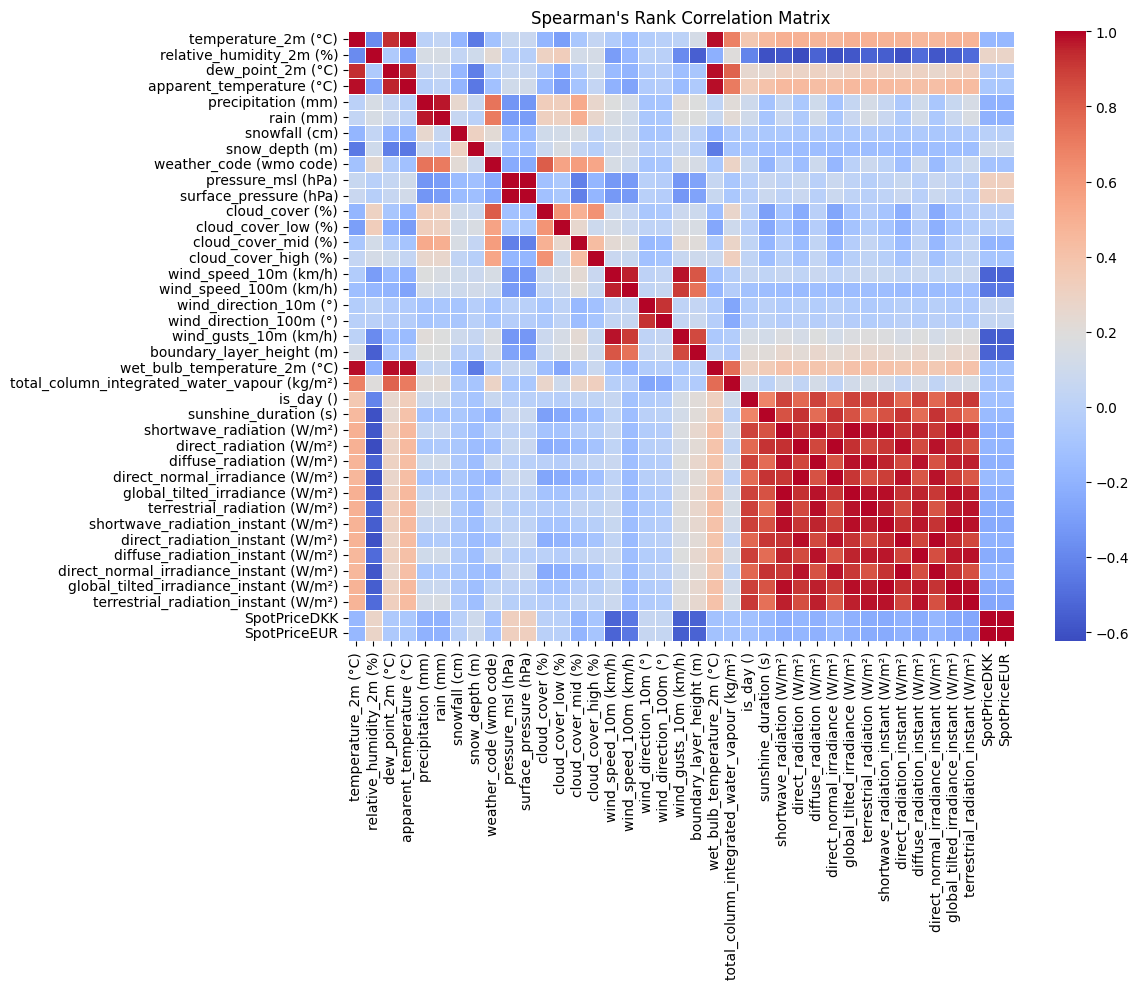

In [9]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(spearman_corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', linewidths=.5)

# Add title and labels
plt.title("Spearman's Rank Correlation Matrix")
plt.tight_layout()
plt.show()

In [ ]:
spot_price_corr = spearman_corr_matrix['SpotPriceEUR'].drop('SpotPriceEUR')

# Sort the coefficients in descending order
sorted_corr = spot_price_corr.sort_values(ascending=False)
print(sorted_corr)

SpotPriceDKK                                    1.000000
pressure_msl (hPa)                              0.317405
surface_pressure (hPa)                          0.316669
relative_humidity_2m (%)                        0.280961
snow_depth (m)                                  0.098934
wind_direction_10m (°)                          0.060081
wind_direction_100m (°)                         0.049926
cloud_cover (%)                                -0.007642
cloud_cover_low (%)                            -0.009001
snowfall (cm)                                  -0.013729
dew_point_2m (°C)                              -0.060588
apparent_temperature (°C)                      -0.073754
cloud_cover_high (%)                           -0.096045
total_column_integrated_water_vapour (kg/m²)   -0.100144
weather_code (wmo code)                        -0.109804
wet_bulb_temperature_2m (°C)                   -0.113800
is_day ()                                      -0.119070
direct_normal_irradiance (W/m²)

In [11]:
top_positive_corr = sorted_corr.head(5)  # Top 5 positive correlations
top_negative_corr = sorted_corr.tail(5) 

print("Top positive correlations with SpotPriceEUR:")
print(top_positive_corr)

print("\nTop negative correlations with SpotPriceEUR:")
print(top_negative_corr)

Top positive correlations with SpotPriceEUR:
SpotPriceDKK                1.000000
pressure_msl (hPa)          0.317405
surface_pressure (hPa)      0.316669
relative_humidity_2m (%)    0.280961
snow_depth (m)              0.098934
Name: SpotPriceEUR, dtype: float64

Top negative correlations with SpotPriceEUR:
terrestrial_radiation_instant (W/m²)   -0.261737
wind_speed_100m (km/h)                 -0.460632
wind_speed_10m (km/h)                  -0.533000
boundary_layer_height (m)              -0.538993
wind_gusts_10m (km/h)                  -0.559732
Name: SpotPriceEUR, dtype: float64
